In [3]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import h5py
import os
from imageio import imread
import scipy
import pandas as pd
from matplotlib.pyplot import imsave

# SVD Application: Image Denoiser
By using SVD you can reduce noise of image although you would lose quality of image

<ipython-input-12-5c13999f4ccd>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(image_path, mode='F')  # or mode='L'


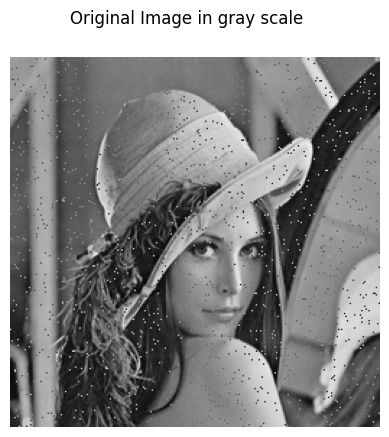

<ipython-input-12-5c13999f4ccd>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(image_path, mode='F')  # or mode='L'


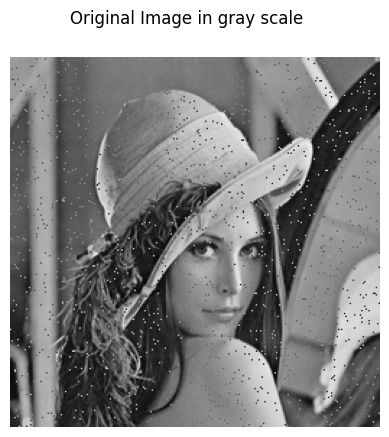

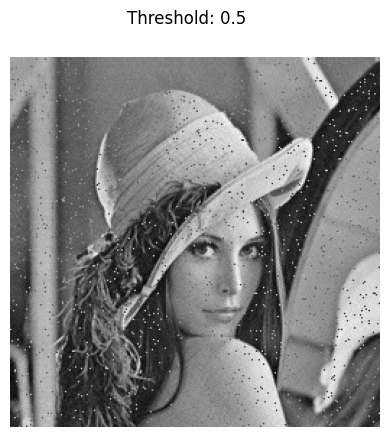

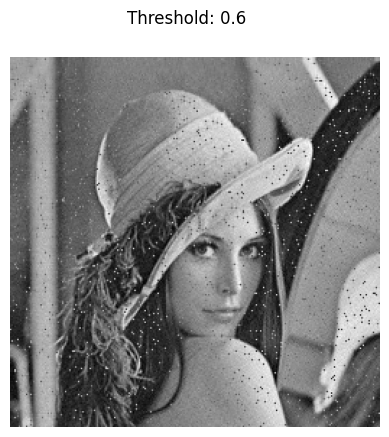

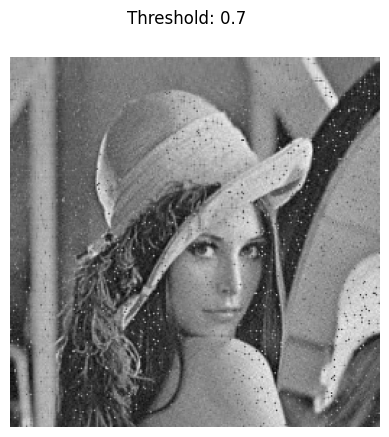

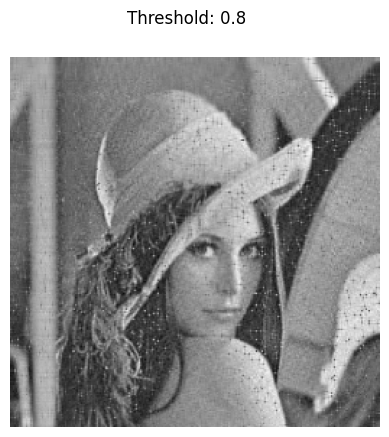

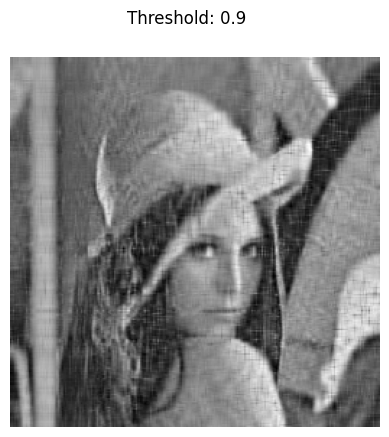

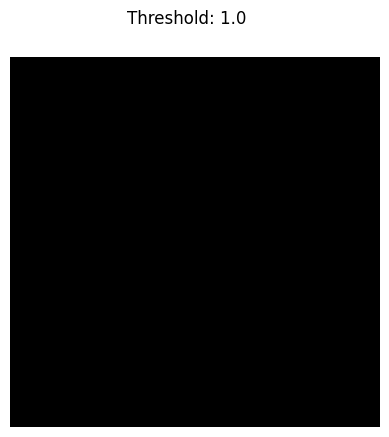

In [12]:
import numpy as np
from imageio import imread, imsave
import matplotlib.pyplot as plt
from PIL import Image

# First Image Processing
image_path = 'pic.jpg'
steps = 0.1

# Read the image in grayscale mode using 'F' or 'L'
img = imread(image_path, mode='F')  # or mode='L'
plt.imshow(img, cmap='gray')
plt.suptitle('Original Image in gray scale')
plt.axis('off')
plt.show()

# Second Image Processing
image_path = 'pic.jpg'
start = 0.5

# Read the image in grayscale mode using 'F' or 'L'
img = imread(image_path, mode='F')  # or mode='L'
plt.imshow(img, cmap='gray')
plt.suptitle('Original Image in gray scale')
plt.axis('off')
plt.show()

# Singular Value Decomposition (SVD) and Denoising
u, s, vh = np.linalg.svd(img, full_matrices=False)
threshold = start
while threshold < 1.0:
    tmp = len(s)
    new_s = s[:]
    for i in range(tmp):
        j = tmp - i - 1
        if i >= tmp * threshold:
            break
        new_s[j] = 0.0
    denoised = np.dot(u * new_s, vh)

    plt.imshow(denoised, cmap='gray')  # Ensuring the image is displayed in grayscale
    plt.axis('off')
    plt.suptitle(f'Threshold: {str(round(threshold, 2))}')
    plt.show()

    # Convert to 'L' mode and save the denoised image
    denoised_img = Image.fromarray(denoised).convert('L')
    denoised_img.save(image_path.split('.')[0] + f'_{str(round(threshold, 2))}_denoised.jpg')

    threshold += steps


Image Compression:
(SVD) on a single grayscale image to compress and reconstruct it at different levels of compression (k values) and displays the original and reconstructed images along with the percentage of space saved. It also uses tqdm to show progress for the different compression levels during the SVD performance test.

  0%|          | 0/5 [00:00<?, ?it/s]

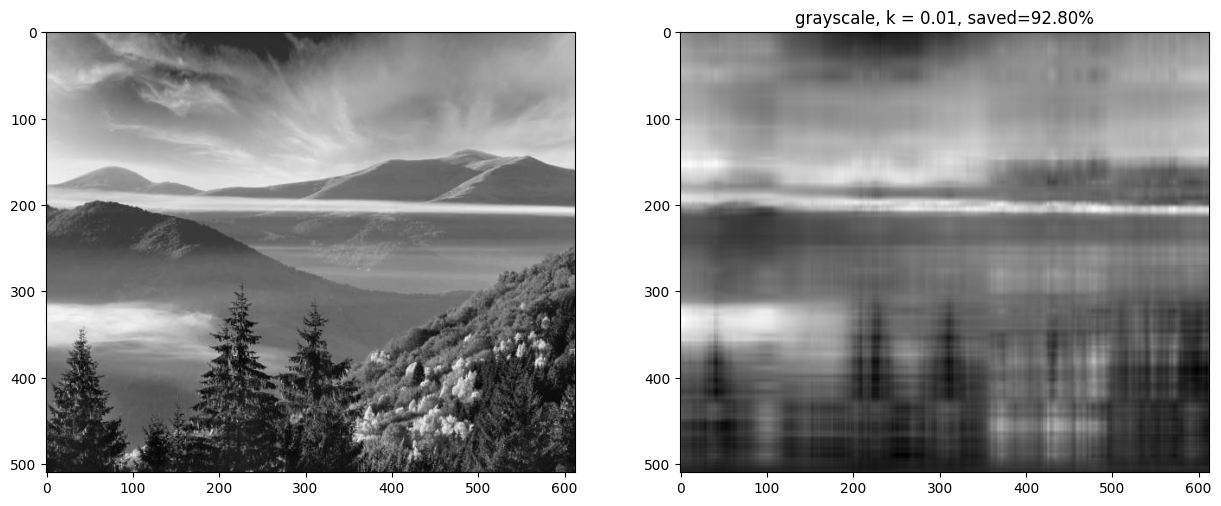

 20%|██        | 1/5 [00:00<00:03,  1.18it/s]

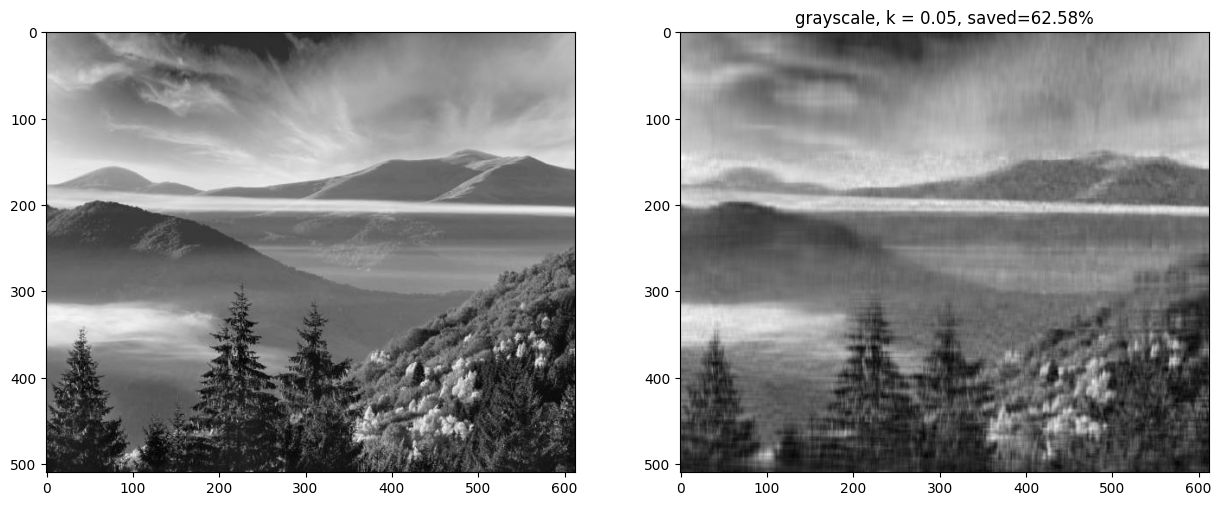

 40%|████      | 2/5 [00:01<00:02,  1.11it/s]

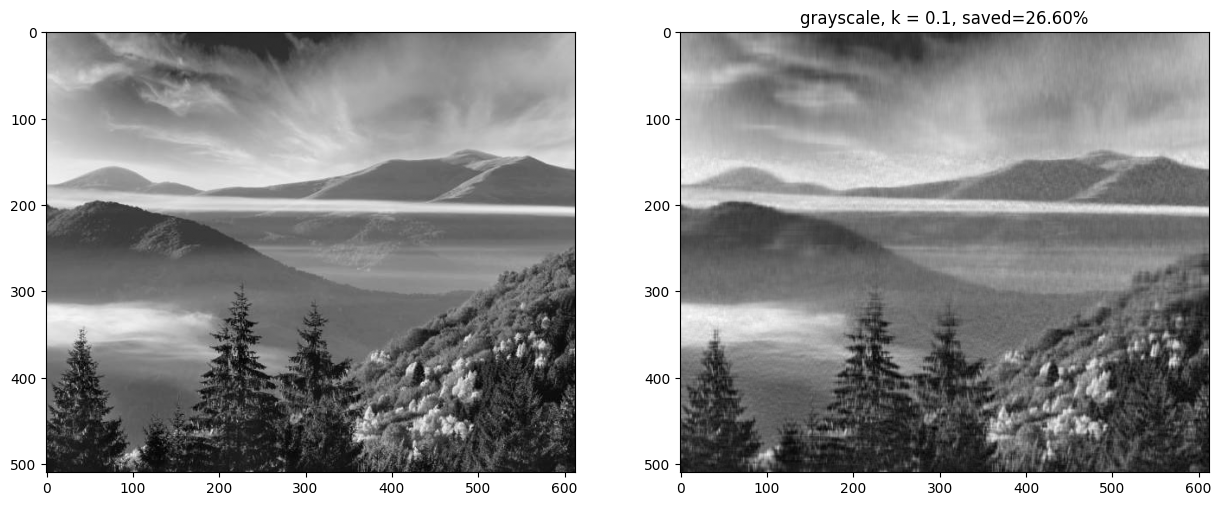

 60%|██████    | 3/5 [00:02<00:01,  1.09it/s]

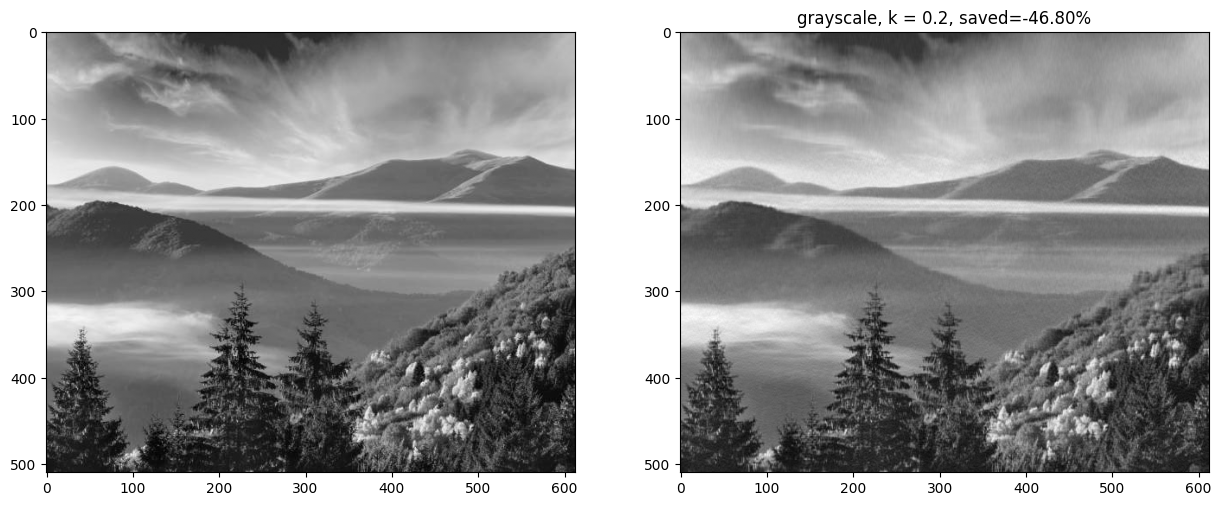

 80%|████████  | 4/5 [00:04<00:01,  1.09s/it]

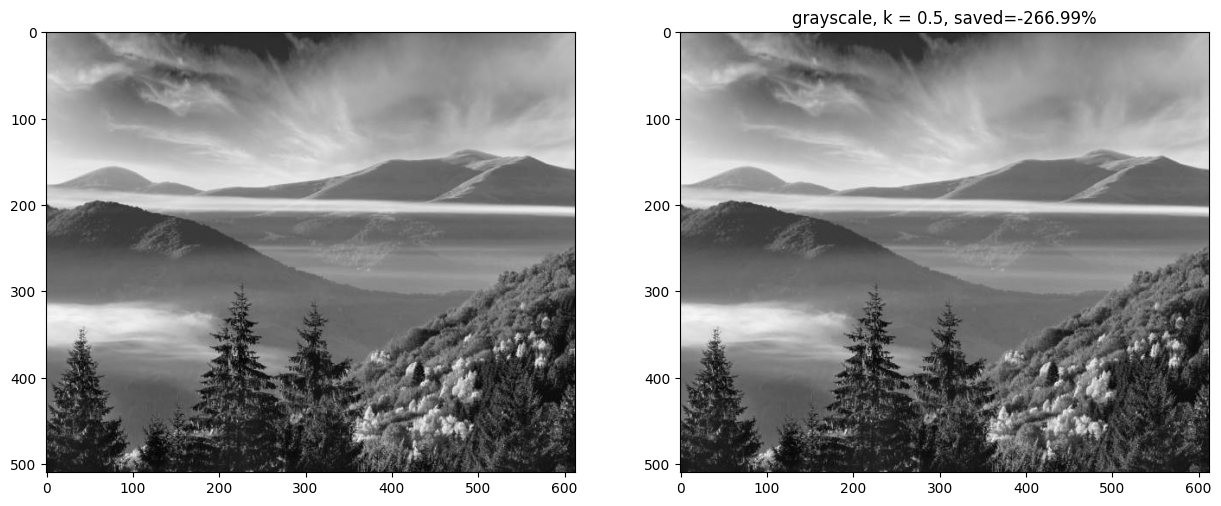

100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


In [15]:
# Import necessary libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Path to the single grayscale image
path_grey = 'grayscale.jpg'

# Load the grayscale image
img = Image.open(path_grey).convert('L')
img_matrix = np.array(img)
gray_images = [img_matrix]
gray_images_names = [os.path.splitext(os.path.basename(path_grey))[0]]

# Function to perform SVD on an image
def performSVD(img, gray=True, k=0.05):
    num = None
    if gray:
        U, S, V = np.linalg.svd(img, full_matrices=False)
        num = round(S.shape[0] * k)
        return [U[:, :num], S[:num], V[:num, :], num]

# Function to reconstruct an image from its SVD components
def reconstructSVD(U, S, V, gray=True):
    if gray:
        return np.dot(U, np.dot(np.diag(S), V))

# Function to calculate space savings
def spaceSavings(imgarr, k, gray=True):
    rows, cols = imgarr.shape[:2]
    bpp = imgarr.itemsize * 8
    bps = np.dtype(np.float32).itemsize * 8
    orig_size = rows * cols * bpp
    rankk_size = (rows * k + k + k * cols) * bps
    saved = (orig_size - rankk_size) / orig_size * 100
    return saved

# Function to process an image and display/save results
def processIMG(img, name, k, gray=True):
    svd = performSVD(img, gray, k)
    num = svd[3]
    reconstruction = reconstructSVD(svd[0], svd[1], svd[2], gray)
    plt.figure(figsize=(15, 6))
    saved = spaceSavings(img, num, gray)
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.subplot(122)
    plt.imshow(reconstruction, cmap='gray')
    plt.title(f'{name}, k = {k}, saved={saved:.2f}%')
    plt.show()

# Function to test SVD performance on the grayscale image
def testPerformanceGray():
    k_params = [0.01, 0.05, 0.1, 0.2, 0.5]
    for k in tqdm(k_params):
        processIMG(gray_images[0], gray_images_names[0], k)

# Run the performance test
testPerformanceGray()


# Checking Dataset for Classification:

In [ ]:
labels = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

In [ ]:
import h5py
path = "/content/usps.h5"
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [ ]:
print(X_tr.shape)
print(y_tr.shape)
print(X_te.shape)
print(y_te.shape)

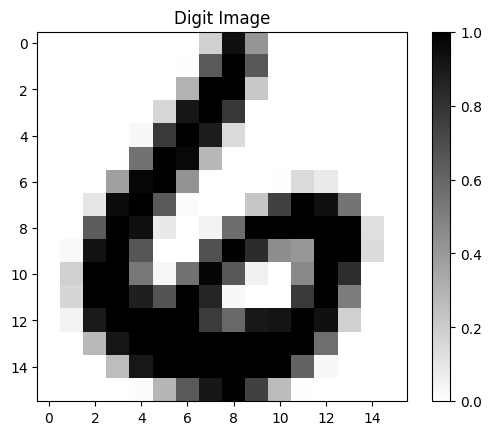

In [ ]:
import matplotlib.pyplot as plt

# Extract the first digit image
digit_image = X_tr[0]

# Reshape and plot the image
plt.imshow(digit_image.reshape(16, 16), cmap='binary')
plt.colorbar()
plt.title("Digit Image")
plt.show()

# A Simple Classification Algorithm

Training: Given the manually classified training set, compute the means (centroids) mi, i = 0,..., 9, of all the 10 classes.

Classification: For each digit in the test set, classify it as k if mk is the closest
mean.

In [ ]:
num_classes = 10
centroids = []
for i in range(num_classes):
    class_data = X_tr[y_tr == i]  # Select data points of class i
    centroid = np.mean(class_data, axis=0)  # Compute the mean (centroid)
    centroids.append(centroid)

centroids = np.array(centroids)

# Classify the test set
predictions = []
for x in X_te:
    distances = np.linalg.norm(centroids - x, axis=1)  # Compute distance to each centroid
    predicted_class = np.argmin(distances)  # Find the nearest centroid
    predictions.append(predicted_class)

predictions = np.array(predictions)

# Calculate accuracy
accuracy = np.mean(predictions == y_te)
print(f"Classification accuracy: {accuracy:.2f}")

Classification accuracy: 0.81


It turns out that for our test set, the success rate of this algorithm is around 80%, which is not good enough. The reason for this is that the algorithm does not use any information about the variation within each class of digits.

# Classification Using SVD Bases

In [ ]:
alpha_matrices={}

In [ ]:
for i in range(10):
    # Get the Boolean mask where the labels are equal to i
    mask = y_tr == i

    # Use the mask to index the rows in X_tr
    alpha_matrices["A" + str(i)] = X_tr[mask]

print(alpha_matrices['A0'].shape)

(1194, 256)


In [ ]:
left_singular={}
singular_matix={}
right_singular={}

In [ ]:

left_singular = {}
singular_matrix = {}
right_singular = {}

for i in range(10):
    u, s, v_t = np.linalg.svd(alpha_matrices[f"A{i}"].T, full_matrices=False)
    left_singular[f"u{i}"] = u  # Shape: (256, 256)
    singular_matrix[f"s{i}"] = s
    right_singular[f"v_t{i}"] = v_t


In [ ]:
print(left_singular['u0'].shape)

(256, 256)


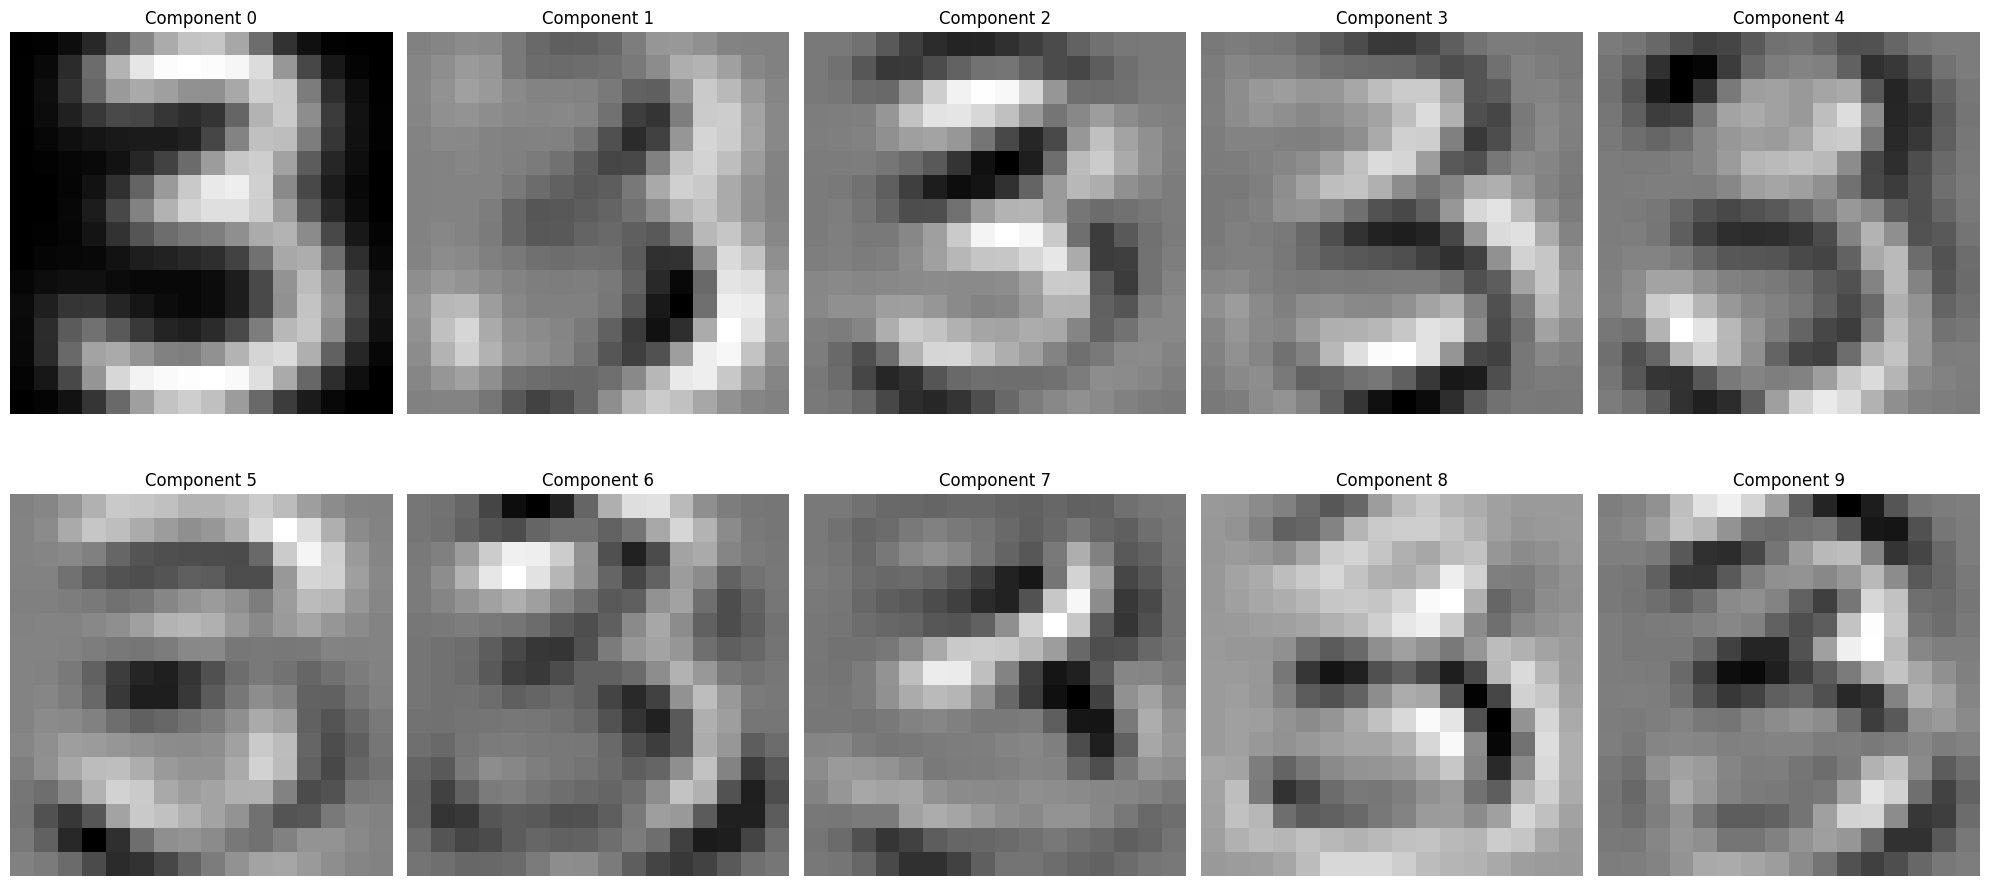

In [ ]:
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
columns = 5
rows = math.ceil(10 / columns)  # Use math.ceil to ensure rows is an integer

for i in range(10):
    plt.subplot(rows, columns, i + 1)  # Corrected subplot line
    plt.imshow(left_singular["u3"][:, i].reshape(16, 16), cmap='binary')  # Display image
    plt.title(f"Component {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


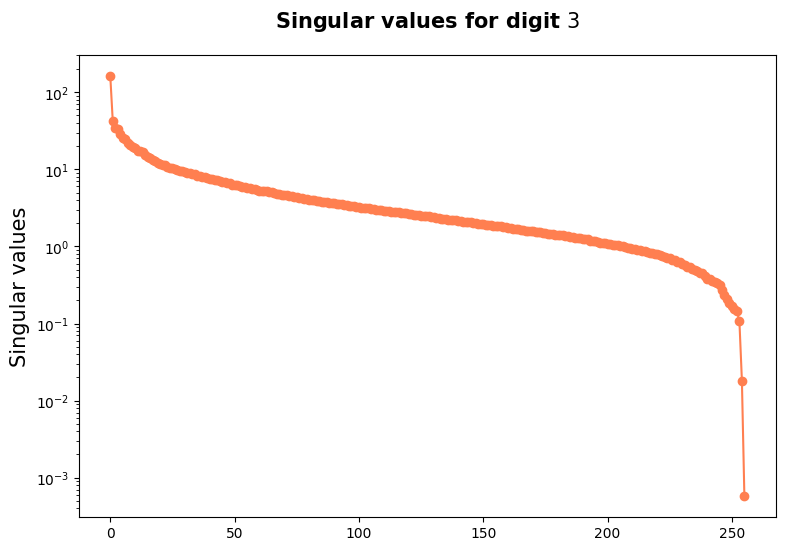

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(singular_matix['s3'], color='coral', marker='o')
plt.title('Singular values for digit $3$',fontsize=15,weight="bold",pad=20)
plt.ylabel('Singular values' ,fontsize=15)
plt.yscale("log")
plt.show()

In [ ]:
import numpy as np
from numpy.linalg import norm
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the test matrix and identity matrix
I = np.eye(X_te.shape[1])  # Identity matrix with size matching features of test data
kappas = np.arange(5, 21)  # Range of k values to test
len_test = X_te.shape[0]  # Number of test samples
predictions = np.empty((len_test, 0), dtype=int)  # Initialize predictions array

# Loop through each k value
for k in kappas:
    prediction = []
    for i in range(len_test):
        residuals = []
        for j in range(10):  # Loop through digit classes
            u = left_singular[f"u{j}"][:, :k]  # Select first k left singular vectors for digit j
            # Project X_te[i] onto the subspace spanned by u
            projection = np.dot(u, np.dot(u.T, X_te[i]))
            # Compute the residual as the difference between X_te[i] and its projection
            res = norm(X_te[i] - projection)
            residuals.append(res)
        index_min = np.argmin(residuals)  # Get the class with the minimum residual
        prediction.append(index_min)

    prediction = np.array(prediction)
    predictions = np.hstack((predictions, prediction.reshape(-1, 1)))


# Compute accuracy for each k value
scores = []
for i in range(len(kappas)):
    score = accuracy_score(y_te, predictions[:, i])  # Compare predictions with true labels
    scores.append(score)

# Create a DataFrame to store results
data = {"Number of Basis Vectors": kappas, "Accuracy Score": scores}
df = pd.DataFrame(data).set_index("Number of Basis Vectors")

# Display the DataFrame
print(df)


                         Accuracy Score
Number of Basis Vectors                
5                              0.919283
6                              0.920279
7                              0.926756
8                              0.932735
9                              0.933234
10                             0.934728
11                             0.936223
12                             0.945192
13                             0.944195
14                             0.944195
15                             0.944195
16                             0.944694
17                             0.942202
18                             0.940708
19                             0.939213
20                             0.941206


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test is a numpy array, use it directly for the classification report
print(classification_report(y_te, predictions[:, 7]))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       359
           1       0.96      0.98      0.97       264
           2       0.95      0.91      0.93       198
           3       0.95      0.87      0.91       166
           4       0.92      0.93      0.92       200
           5       0.89      0.92      0.90       160
           6       0.97      0.96      0.97       170
           7       0.98      0.95      0.97       147
           8       0.95      0.93      0.94       166
           9       0.93      0.95      0.94       177

    accuracy                           0.95      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.95      0.95      0.95      2007



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming y_te is a numpy array, we directly use it for indexing
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_te, predictions[:, 7]))

# Rename the columns and rows based on the labels
confusion_matrix_df = confusion_matrix_df.rename(columns=labels, index=labels)

# Display the confusion matrix
confusion_matrix_df


0    1    2    3    4    5    6    7    8    9
0  354    0    2    0    2    0    0    0    0    1
1    0  258    0    0    3    0    3    0    0    0
2    8    0  180    1    3    1    1    1    3    0
3    2    0    2  144    0   13    0    0    4    1
4    0    3    2    0  186    2    1    1    0    5
5    2    1    1    4    1  147    0    0    1    3
6    2    0    1    0    2    1  164    0    0    0
7    0    1    1    0    3    0    0  140    1    1
8    3    1    1    3    0    2    0    0  155    1
9    0    4    0    0    3    0    0    1    0  169

In [ ]:
from sklearn.metrics import accuracy_score

# Let's use the predictions generated earlier (for k = 7 in this example)
k_value = 7
svd_predictions = predictions[:, k_value - 5]  # Adjust index based on the k value you used
svd_accuracy = accuracy_score(y_te, svd_predictions)

print(f"SVD Accuracy (for k={k_value}): {svd_accuracy:.4f}")


SVD Accuracy (for k=7): 0.9268


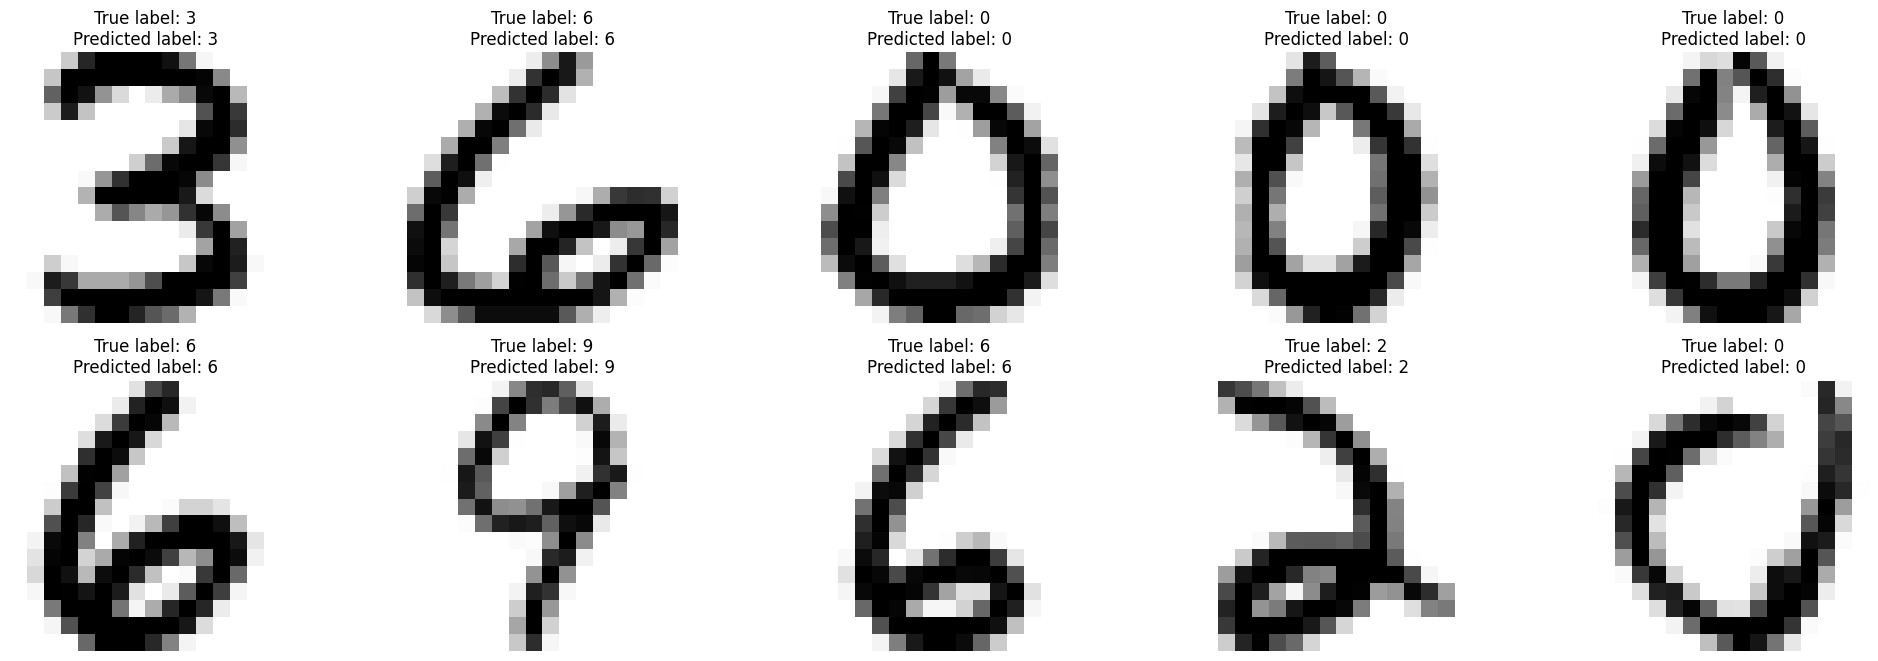

In [ ]:
import matplotlib.pyplot as plt

# Loop through the predictions and plot the results
plt.figure(figsize=(20, 10))
columns = 5  # Number of columns in the plot

# Correctly classified images
correct_classified = np.where(y_te == predictions[:, 7])  # Adjust the index as needed (e.g., for k=7)

for i in range(2, 12):
    correct_id = correct_classified[0][i]
    image = X_te[correct_id]  # Use X_te for test data

    plt.subplot(10 // columns + 1, columns, i - 1)  # Use integer division for rows
    plt.imshow(image.reshape(16, 16), cmap='binary')
    plt.title(f"True label: {y_te[correct_id]}\nPredicted label: {predictions[correct_id, 7]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
misclassified = np.where(y_te != predictions[:, 7])

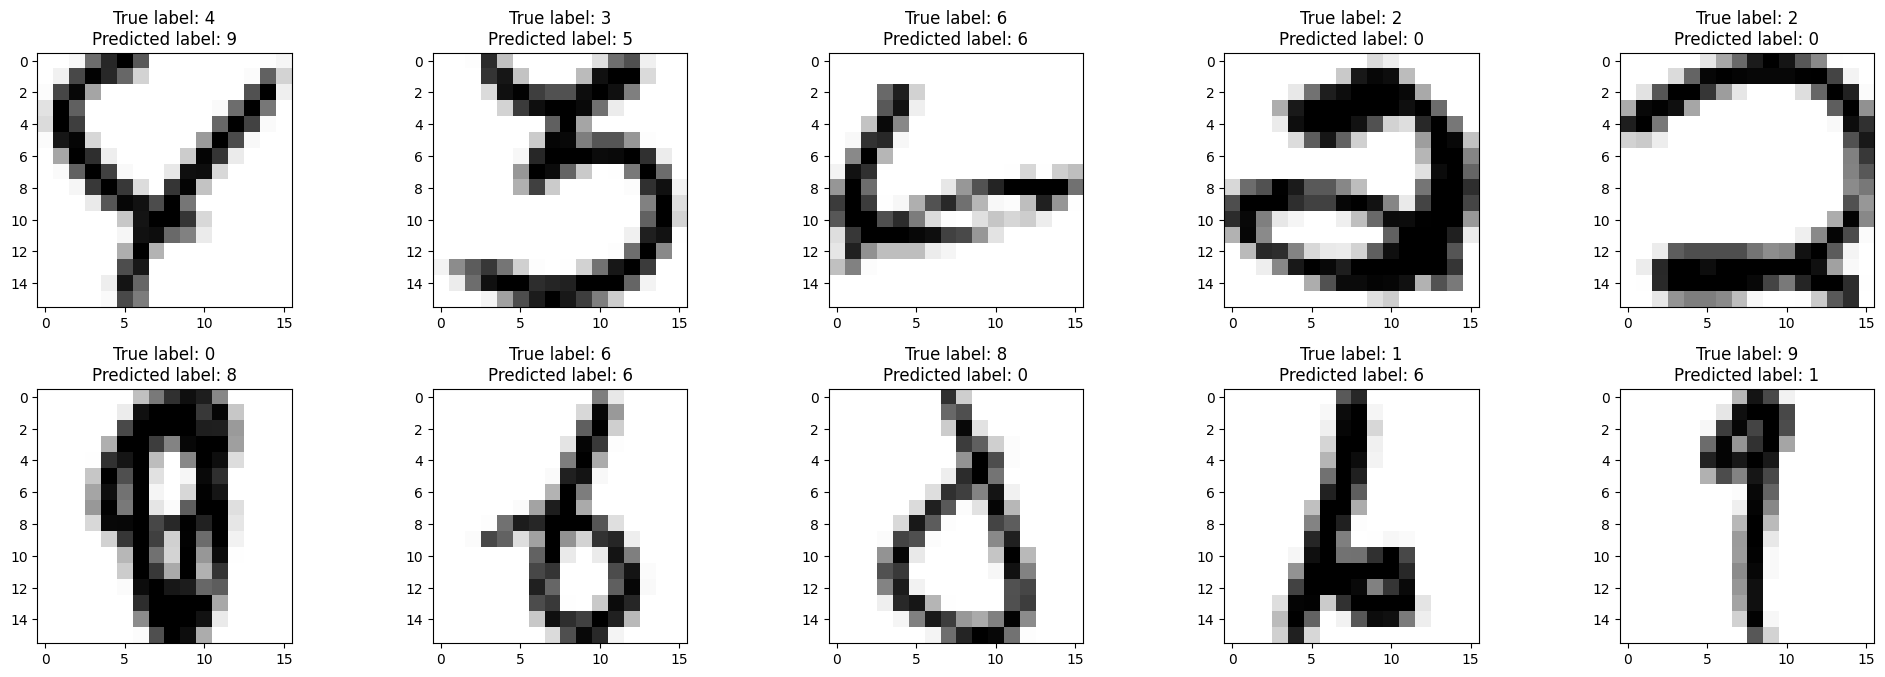

In [ ]:
plt.figure(figsize=(20, 10))
columns = 5

for i in range(2, 12):
    misclassified_id = misclassified[0][i]
    image = X_te[misclassified_id]  # Use X_te instead of x_test

    plt.subplot(10 // columns + 1, columns, i - 1)  # Use integer division for rows
    plt.imshow(image.reshape(16, 16), cmap='binary')

    # Assuming y_te is a 1D numpy array, use the index to get the true label
    plt.title(f"True label: {y_te[misclassified_id]}\nPredicted label: {predictions[misclassified_id, 12]}")

plt.tight_layout()
plt.show()


# KNN for Classification:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Flatten the images for KNN (reshape each 16x16 image into a 1D vector)
X_tr_flat = X_tr.reshape(X_tr.shape[0], -1)  # Flatten training images
X_te_flat = X_te.reshape(X_te.shape[0], -1)  # Flatten test images

# Create a KNN classifier
k_neighbors = 3  # You can experiment with different values of k (number of neighbors)
knn = KNeighborsClassifier(n_neighbors=k_neighbors)

# Train the KNN classifier
knn.fit(X_tr_flat, y_tr)

# Make predictions on the test set
knn_predictions = knn.predict(X_te_flat)

# Calculate accuracy
knn_accuracy = accuracy_score(y_te, knn_predictions)

# Print classification results for KNN
print("KNN Classification Report:")
print(classification_report(y_te, knn_predictions))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       359
           1       0.98      0.98      0.98       264
           2       0.93      0.92      0.93       198
           3       0.94      0.92      0.93       166
           4       0.93      0.92      0.92       200
           5       0.94      0.90      0.92       160
           6       0.98      0.96      0.97       170
           7       0.93      0.94      0.93       147
           8       0.96      0.91      0.93       166
           9       0.91      0.95      0.93       177

    accuracy                           0.94      2007
   macro avg       0.94      0.94      0.94      2007
weighted avg       0.95      0.94      0.94      2007



In [ ]:
knn_confusion_matrix = pd.DataFrame(confusion_matrix(y_te, knn_predictions))

knn_confusion_matrix

0    1    2    3    4    5    6    7    8    9
0  355    0    3    0    0    0    0    0    0    1
1    0  258    0    0    3    0    2    1    0    0
2    8    0  183    1    1    0    0    2    3    0
3    3    0    2  153    0    6    0    1    0    1
4    0    2    0    0  183    2    2    2    1    8
5    5    0    3    3    0  144    0    0    1    4
6    3    1    1    0    2    0  163    0    0    0
7    0    1    1    1    4    0    0  138    1    1
8    4    0    3    4    0    1    0    1  151    2
9    2    0    0    0    3    0    0    4    0  168

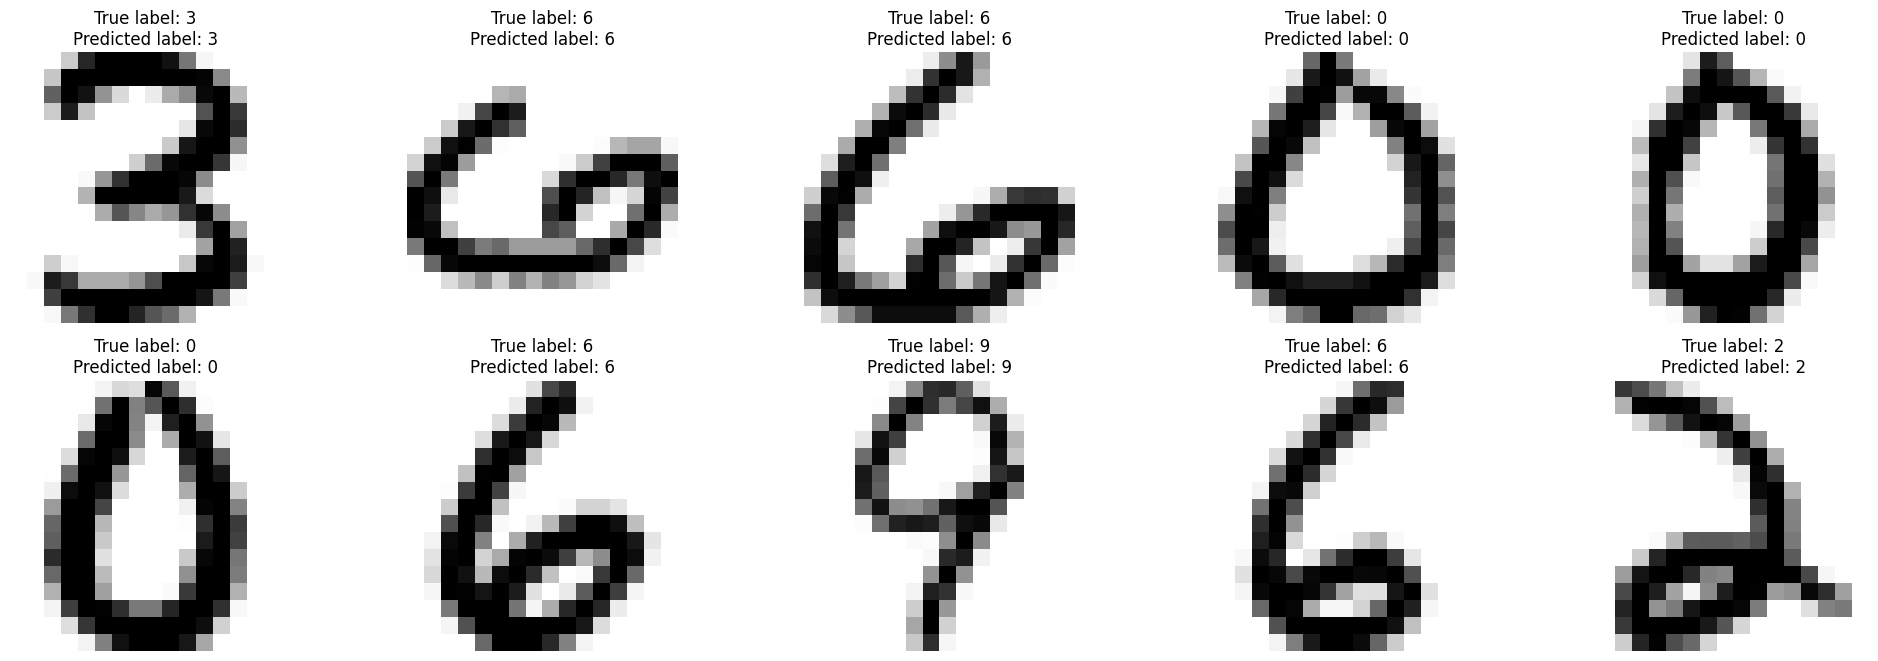

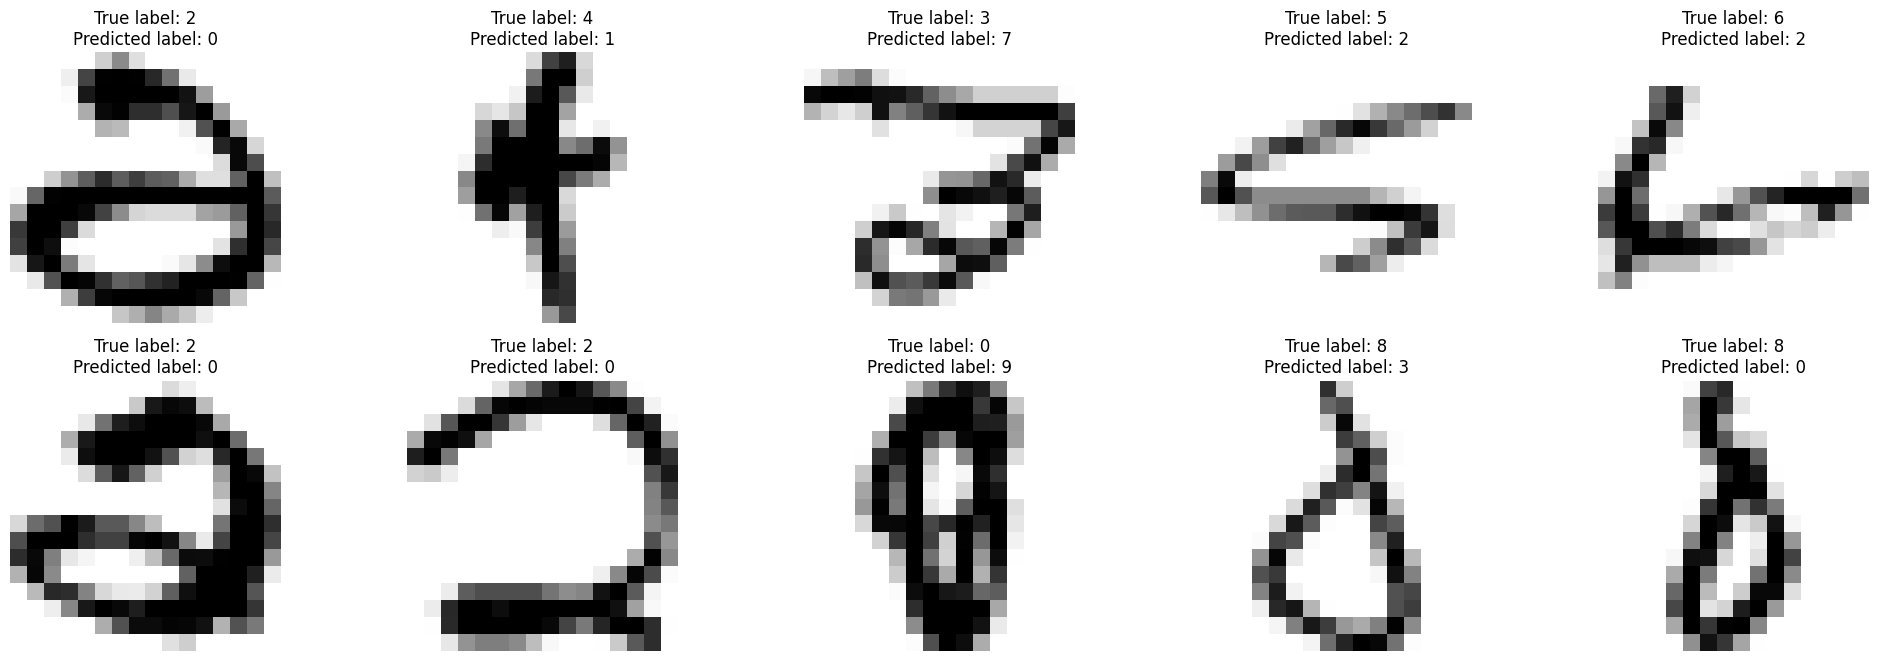

KNN Accuracy: 0.9447


In [ ]:
# Visualize some KNN classification results (correct and misclassified)
correct_knn = np.where(y_te == knn_predictions)[0]
misclassified_knn = np.where(y_te != knn_predictions)[0]

# Correctly classified KNN images
plt.figure(figsize=(20, 10))
for i in range(2, 12):
    correct_id_knn = correct_knn[i]
    image = X_te[correct_id_knn]

    plt.subplot(10 // columns + 1, columns, i - 1)
    plt.imshow(image.reshape(16, 16), cmap='binary')
    plt.title(f"True label: {y_te[correct_id_knn]}\nPredicted label: {knn_predictions[correct_id_knn]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Misclassified KNN images
plt.figure(figsize=(20, 10))
for i in range(2, 12):
    misclassified_id_knn = misclassified_knn[i]
    image = X_te[misclassified_id_knn]

    plt.subplot(10 // columns + 1, columns, i - 1)
    plt.imshow(image.reshape(16, 16), cmap='binary')
    plt.title(f"True label: {y_te[misclassified_id_knn]}\nPredicted label: {knn_predictions[misclassified_id_knn]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Compare KNN accuracy with the SVD-based approach
print(f"KNN Accuracy: {knn_accuracy:.4f}")